<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [1]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')
df = df.drop(['Unnamed: 0', 'url'], axis=1)
print(df.shape)
df.head()

(1300, 3)


,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...


In [3]:
df.dtypes

title          object
company        object
description    object
dtype: object

In [4]:
df.isnull().sum()

title          0
company        0
description    0
dtype: int64

In [5]:
df = df.drop_duplicates(['description'], keep='last').reset_index(drop=True)
print(df.shape)
df.head()

(757, 3)


,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
1,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
2,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...
4,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell..."


### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [6]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [7]:
for idx, text in enumerate(df['description']):
    text = text.lower()
    text = text.replace('\n',' ')
    text = re.sub(r'[^a-z0-9 ]', '', text)
    df['description'][idx] = text

In [8]:
df

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,job details description essential duties and r...
1,"Specialist, Data Science",Nationwide,as a team member in the finance and internal a...
2,Sr. Data Scientist (Remote),American Credit Acceptance,overview american credit acceptance seeks a hi...
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",jp morgans corporate investment bank cib is a...
4,Data Scientist,VyStar Credit Union,at vystar we offer competitive pay an excellen...
...,...,...,...
752,Senior Data & Applied Scientist,Microsoft,senior data applied scientist do you have a p...
753,Senior Data Scientist,Takeda Pharmaceuticals,job description objectives effectively working...
754,Senior Data Scientist,eBay Inc.,ebay is a global commerce leader that allows y...
755,Senior Data Scientist,Cox Automotive,cox automotive a subsidiary of cox enterprises...


In [9]:
tokens = []

for text in tokenizer.pipe(df['description']):
    text_tokens = [token.text for token in text if token.text != ' ']
    tokens.append(text_tokens)

df['tokens'] = tokens
df.head()

,title,company,description,tokens
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,job details description essential duties and r...,"[job, details, description, essential, duties,..."
1,"Specialist, Data Science",Nationwide,as a team member in the finance and internal a...,"[as, a, team, member, in, the, finance, and, i..."
2,Sr. Data Scientist (Remote),American Credit Acceptance,overview american credit acceptance seeks a hi...,"[overview, american, credit, acceptance, seeks..."
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",jp morgans corporate investment bank cib is a...,"[jp, morgans, corporate, investment, bank, cib..."
4,Data Scientist,VyStar Credit Union,at vystar we offer competitive pay an excellen...,"[at, vystar, we, offer, competitive, pay, an, ..."


### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [10]:
!pip install squarify

In [11]:
import squarify

In [12]:
from collections import Counter

def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [13]:
wc = word_count(df['tokens'])

In [14]:
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
63,and,755,21863,1.0,0.056373,0.056373,0.997358
136,to,754,12694,2.0,0.032731,0.089104,0.996037
166,the,745,10538,3.0,0.027172,0.116276,0.984148
43,of,745,8839,4.0,0.022791,0.139067,0.984148
214,data,740,7425,5.0,0.019145,0.158212,0.977543


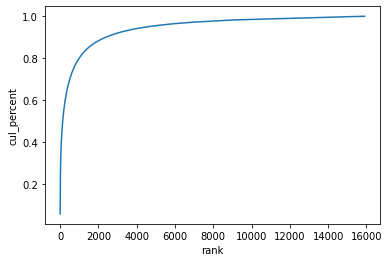

In [15]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

     word  word_in_docs  count  ...   percent  cul_percent  word_in_docs_percent
63    and           755  21863  ...  0.056373     0.056373              0.997358
136    to           754  12694  ...  0.032731     0.089104              0.996037
166   the           745  10538  ...  0.027172     0.116276              0.984148
43     of           745   8839  ...  0.022791     0.139067              0.984148
214  data           740   7425  ...  0.019145     0.158212              0.977543
53     in           748   6769  ...  0.017454     0.175666              0.988111
86      a           739   6436  ...  0.016595     0.192261              0.976222
189  with           742   5727  ...  0.014767     0.207028              0.980185
587   for           727   4132  ...  0.010654     0.217682              0.960370
37     or           708   3812  ...  0.009829     0.227511              0.935271

[10 rows x 7 columns]


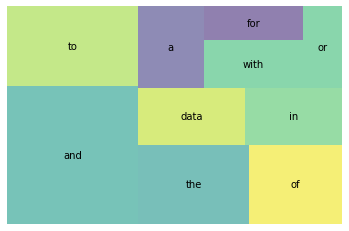

In [16]:
wc_top10 = wc[wc['rank'] <= 10]
print(wc_top10)

squarify.plot(sizes=wc_top10['percent'], label=wc_top10['word'], alpha=0.6 )
plt.axis('off')
plt.show()

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [17]:
STOP_WORDS = nlp.Defaults.stop_words

adding_words = {"data", "work"}
STOP_WORDS_ex = STOP_WORDS.union(adding_words)

In [18]:
tokens = []

for doc in tokenizer.pipe(df['description']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS_ex and token.text != ' ':
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [19]:
wc_stop_word = word_count(df['tokens'])
wc_stop_word.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
187,experience,705,3450,1.0,0.014376,0.014376,0.931308
249,business,536,2064,2.0,0.008601,0.022977,0.708058
193,science,611,1648,3.0,0.006867,0.029845,0.807133
55,team,588,1625,4.0,0.006772,0.036616,0.776750
238,learning,526,1596,5.0,0.006651,0.043267,0.694848
63,analysis,516,1349,6.0,0.005621,0.048888,0.681638
90,skills,547,1251,7.0,0.005213,0.054101,0.722589
500,machine,470,1152,8.0,0.004800,0.058902,0.620872
331,analytics,428,1136,9.0,0.004734,0.063636,0.565390
17,models,459,1034,10.0,0.004309,0.067944,0.606341


### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [20]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [21]:
df['lemmas'] = df['description'].apply(get_lemmas)

In [22]:
tokens_lemma = []

for doc in df['lemmas']:
    
    doc_tokens = []
    
    for token in doc: 
        if token not in STOP_WORDS and token != ' ':
            doc_tokens.append(token)
   
    tokens_lemma.append(doc_tokens)
    
df['tokens_lemma'] = tokens_lemma
df['tokens_lemma']

0      [job, detail, description, essential, duty, re...
1      [team, member, finance, internal, audit, depar...
2      [overview, american, credit, acceptance, seek,...
3      [jp, morgans, corporate, investment, bank, cib...
4      [vystar, offer, competitive, pay, excellent, b...
                             ...                        
752    [senior, datum, applied, scientist, passion, d...
753    [job, description, objective, effectively, wor...
754    [ebay, global, commerce, leader, allow, shape,...
755    [cox, automotive, subsidiary, cox, enterprise,...
756    [tldr, spring, accelerate, discovery, therapy,...
Name: tokens_lemma, Length: 757, dtype: object

In [23]:
df

,title,company,description,tokens,lemmas,tokens_lemma
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,job details description essential duties and r...,"[job, details, description, essential, duties,...","[job, detail, description, essential, duty, re...","[job, detail, description, essential, duty, re..."
1,"Specialist, Data Science",Nationwide,as a team member in the finance and internal a...,"[team, member, finance, internal, audit, depar...","[team, member, finance, internal, audit, depar...","[team, member, finance, internal, audit, depar..."
2,Sr. Data Scientist (Remote),American Credit Acceptance,overview american credit acceptance seeks a hi...,"[overview, american, credit, acceptance, seeks...","[overview, american, credit, acceptance, seek,...","[overview, american, credit, acceptance, seek,..."
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",jp morgans corporate investment bank cib is a...,"[jp, morgans, corporate, investment, bank, cib...","[jp, morgans, corporate, , investment, bank, ...","[jp, morgans, corporate, investment, bank, cib..."
4,Data Scientist,VyStar Credit Union,at vystar we offer competitive pay an excellen...,"[vystar, offer, competitive, pay, excellent, b...","[vystar, offer, competitive, pay, excellent, b...","[vystar, offer, competitive, pay, excellent, b..."
...,...,...,...,...,...,...
752,Senior Data & Applied Scientist,Microsoft,senior data applied scientist do you have a p...,"[senior, applied, scientist, passion, machine,...","[senior, datum, , applied, scientist, passion...","[senior, datum, applied, scientist, passion, d..."
753,Senior Data Scientist,Takeda Pharmaceuticals,job description objectives effectively working...,"[job, description, objectives, effectively, wo...","[job, description, objective, effectively, wor...","[job, description, objective, effectively, wor..."
754,Senior Data Scientist,eBay Inc.,ebay is a global commerce leader that allows y...,"[ebay, global, commerce, leader, allows, shape...","[ebay, global, commerce, leader, allow, shape,...","[ebay, global, commerce, leader, allow, shape,..."
755,Senior Data Scientist,Cox Automotive,cox automotive a subsidiary of cox enterprises...,"[cox, automotive, subsidiary, cox, enterprises...","[cox, automotive, subsidiary, cox, enterprise,...","[cox, automotive, subsidiary, cox, enterprise,..."


In [24]:
wc_lemma = word_count(df['tokens_lemma'])
wc_lemma_top10 = wc_lemma[wc_lemma['rank'] <= 10]

wc_lemma_top10

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
7,datum,723,5067,1.0,0.020456,0.020456,0.955086
184,experience,707,3622,2.0,0.014623,0.035079,0.933950
65,work,697,2861,3.0,0.011550,0.046629,0.920740
188,data,656,2358,4.0,0.009520,0.056149,0.866579
53,team,636,2298,5.0,0.009277,0.065426,0.840159
236,business,544,2157,6.0,0.008708,0.074134,0.718626
191,science,618,1704,7.0,0.006879,0.081013,0.816380
58,analysis,543,1580,8.0,0.006379,0.087392,0.717305
157,model,543,1554,9.0,0.006274,0.093666,0.717305
336,analytic,455,1379,10.0,0.005567,0.099233,0.601057


## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 7) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - `max_features = 3000` 으로 설정합니다.

In [26]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfidf = TfidfVectorizer(tokenizer=get_lemmas, stop_words='english', max_features=3000)

# Fit 후 dtm을 만듭니다.(문서, 단어마다 tf-idf 값을 계산합니다)
dtm_tfidf = tfidf.fit_transform(df['description'])

dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())
dtm_tfidf

,,,,0,03,1,10,100,1000,11,12,120,13,14,15,150,18,2,20,200,2000,2015,2016,2017,2018,2019,2020,23,24,25,3,30,300,35,4,40,401k,45,5,50,...,wholly,whollyowne,wi,wide,widely,wifi,wild,wildlife,willing,willingness,win,wind,wireless,woman,word,work,workday,worker,workflow,workforce,working,worklife,workload,workplace,workshop,world,worldclass,worldwide,wrangle,wri,wris,write,writing,year,yes,york,yrs,zillow,zone,zulily
0,0.224129,0.082804,0.0,0.0,0.0,0.000000,0.055997,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.043958,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.043436,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.068905,0.0,0.0,0.0,0.0,0.000000,0.075205,0.0,0.000000,0.0,0.000000,0.060575,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.022815,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.098956,0.000000,0.0,0.0,0.0,0.021347,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.017915,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.053234,0.000000,0.0,0.0,0.022242,0.0,0.000000,0.0,0.017703,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.032135,0.028082,0.0,0.0,0.0,0.0,0.000000,0.137926,0.0,0.000000,0.0,0.000000,0.024688,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.018596,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.209402,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.032856,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.052541,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.056211,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.051091,0.000000,0.017052,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.119490,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.034813,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.043394,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.023212,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.026967,0.000000,0.0,0.0,0.0,0.000000,0.036735,0.0,0.0,0.0,0.0,0.000000,0.010024,0.0,0.000000,0.0,0.036272,0.000000,0.0,0.0,0.0,0.0,0.109326,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.024326,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.038217,0.067772,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.017989,0.030304,0.000000,0.0,0.0,0.037872,0.0,0.0,0.0,0.0,0.0,0.0,0.060608,0.000000,0.028767,0.0,0.0,0.000000,0.0,0.024143,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.020700,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.028383,0.092330,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.028198,0.046682,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.118018,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.034720,0.058489,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.039952,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.118802,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.026995,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.018020,0.000000,0.0,0.0,0.0,0.0,0.0
753,0.000000,0.033423,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.059780,0.035148,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.040834,0.000000,0.0,0.0,0.0,0.000000,0.055626,0.0,0.0,0.0,0.0,0.000000,0.121423,0.0,0.139982,0.0,0.000000,

In [28]:
# dtm을 사용히 NN 모델을 학습시킵니다. (디폴트)최근접 5 이웃.
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [29]:
distance, result = nn.kneighbors([dtm_tfidf.iloc[88].values])

In [30]:
for idx in result:
    print(df['description'][idx][:500])

88     what is pathrise recruiting partners  pathrise...
268    what is pathrise recruiting partners  pathrise...
267    what is pathrise recruiting partners  pathrise...
178    summary posted feb 27 2020 role number20015543...
192    description  reports to vp product development...
Name: description, dtype: object
